In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import sys

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures and animations
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Open ai introductinoi

In [3]:
import gym

In [4]:
env = gym.make('MsPacman-v0')

In [5]:
# the environemnt is initialised by reset method
obs = env.reset()

In [6]:
# observation vary depending on the nevironemnt
# in this case it is an RGB image represented as a 3D nUmpy array
# of shape [width, height, channels]

obs.shape

(210, 160, 3)

In [7]:
# an environemnt can be visualized by calling its render() method
# in this examplewe will set the mode="rgb_array"

img = env.render(mode="rgb_array")


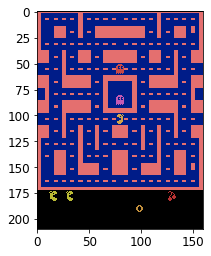

In [10]:
from IPython import display
%matplotlib inline
plt.figure(figsize=(5,4))
for i in range(25):
    plt.imshow(img)
    display.display(plt.gcf())    
    display.clear_output(wait=True)

In [11]:
(img == obs).all()

True

In [31]:
# helper function to plot th eenvironment
def plot_environment(env, figsize=(5,4)):
    plt.close()
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [13]:
env.action_space
# Discrete(9) means that the possible actions are integers 0 through 8, which represents the 9 possible positions of the joystick (0=center, 1=up, 2=right, 3=left, 4=down, 5=upper-right, 6=upper-left, 7=lower-right, 8=lower-left).

Discrete(9)

In [14]:
env.reset()
for step in range(110):
    env.step(3)
for step in range(40):
    env.step(8)

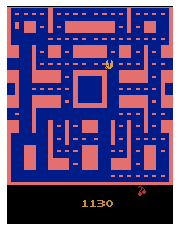

In [32]:
plot_environment(env)

In [18]:
# the step function
obs, reward , done, info =env.step(0)

In [19]:
obs.shape

(210, 160, 3)

In [20]:
reward

0.0

In [21]:
done
# when game is over done returns true

False

In [22]:
info
# its an environemtn specific dictionary that can provide some extra info about the
# internal state of environment,

{'ale.lives': 3}

In [23]:
# playing one full game with 3 lives
frames = []
n_max_steps = 1000
n_change_steps = 10

obs = env.reset()

for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    if done:
        break

In [15]:
# to show the animation
def update_scene(num,frames,patch):
    patch.set_data(frames[num])
    return patch

def plot_animation(frames, repeat=False, interval=40):
    plt.close()
    fig = plt.figure()
    for f in frames:
        plt.imshow(f)
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)

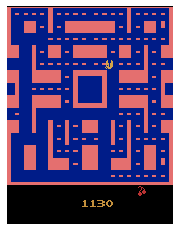

In [37]:
plot_animation(frames)

In [38]:
env.close()

## Cartpole rendering

In [39]:
# trying a differne tpproach for rendering 
# answer taken from
# https://stackoverflow.com/questions/52726475/display-openai-gym-in-jupyter-notebook-only

In [2]:
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

In [3]:
env = gym.make('CartPole-v0')
obs = env.reset()

In [4]:
obs

array([ 0.03988478, -0.00284851,  0.01146226,  0.01759312])

In [5]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering=True
except Exception:
    openai_cart_pole_rendering=False

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        return env.render(mode="rgb_array")
    else:
        # rendering forcart pole environment
        # so badass ageron
        print("self rendering")
        img_w = 600
        img_h = 400
        cart_w = img_w //12
        cart_h = img_h //15
        pole_len = img_h //3.5
        ple_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255,255,255)
        cart_col = 0x000000
        pole_col = 0x669acc
        
        pos,vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x, cart_y - cart_h // 2, top_pole_x,top_pole_y ), fill=pole_col, width=pole_w)
        draw.line((cart_x, cart_y - cart_h//2, top_pole_x, top_pole_y ), fill=pole_col, width=pole_w)
        return np.array(img)

def plot_cart_pole(env,obs):
    plt.close()
    image = render_cart_pole(env, obs)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

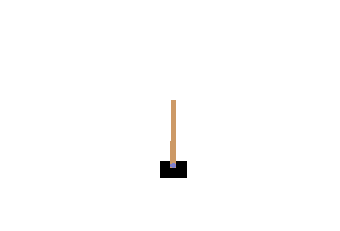

In [6]:
plot_cart_pole(env, obs)

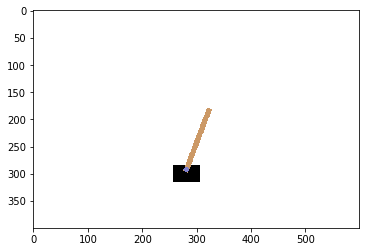

In [10]:
# the other way of rendering cartpole

for i in range(25):
   plt.imshow(env.render(mode='rgb_array'))
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   env.step(env.action_space.sample()) # take a random action

# doesntwork that well because it leaves a dead kernel 
# when we close the other window
# so dont close

In [7]:
env.action_space

Discrete(2)

(-0.5, 599.5, 399.5, -0.5)

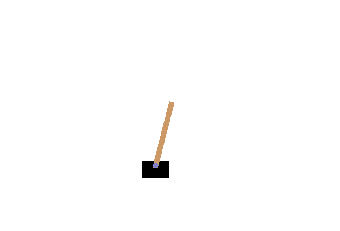

In [8]:
# for cartpole each observation is a 1D array containing 4 floats
# representing the carts horizontal position, angle of pole and the horizontal and angular velocity

# to use render to return image as anarray we can use
# env.render("rgb_array")

# cartpole has only two possible actions accelerate towards left or towards right
# accelerating left till pole falls
obs = env.reset()
while True:
    obs, reward, done, info = env.step(0)
    if done:
        break

plt.close()
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")

# notice that the game fails when it tilts toot muc
# and not when it actually falls

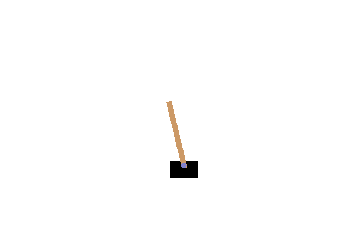

In [10]:
# lets pushto right
obs = env.reset()
while True:
    obs, reward, done, info = env.step(1)
    if done:
        break
plot_cart_pole(env, obs)

### A simple policy
If tilting to left push right otherwise left

In [28]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env,obs)
    frames.append(img)
#     plt.imshow(img)
#     display.display(plt.gcf())    
#     display.clear_output(wait=True)
    # hard coded policy
    position, velocity, angle, angular_velocity = obs
    if angle<0:
        action = 0
    else:
        action =1
    
    obs, reward, done , info = env.step(action)
    if done:
        break

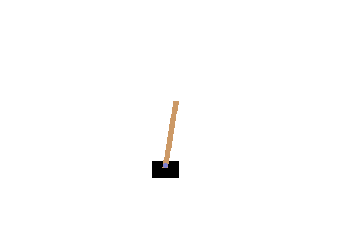

In [29]:
plot_animation(frames)
#system is unstable

In [34]:
# lets create a neral network that will take observation as inputs and output the action to take for
# each observation. To choose an action the network will first estimate
# a probability for each action then select an action randomly according to etimated probabilities
# in case of cart pole environment
# there are two action left or right so we onyl need one output neuton
# it will output a p probability of p and 1 - p will be the probability for the right

import tensorflow as tf

# specify the network architechture
n_inputs = 4 # == env.observation_space.shape[0]
n_hidden = 4 # it a simple task, we dont need more than this
n_outputs = 1 # only outputs the probability of accelerating left
initializer = tf.variance_scaling_initializer()

# build the network
X = tf.placeholder(tf.float32, shape=[None,n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu,
                         kernel_initializer = initializer)
outputs = tf.layers.dense(hidden, n_outputs, activation=tf.nn.elu,
                          kernel_initializer=initializer)

# 3 select a random action based on estimated probailities
p_left_and_right = tf.concat(axis=1, values=[outputs, 1- outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

init = tf.global_variables_initializer()

"""
in thsi particular env, the apst actions and observation can be safely ignored
since each observation contains the environment full state. If there were some hidden state
then you may need to consider past actions and observations in order to try ot
infer the hidden state of the environemtn for example if environment only reveealed the position and not the velocit
we would have to consider past and presnt.

another exampleis if observations are noisy

we are picking one random action 
You may wonder why we are picking a random action 
based on the probability given by the policy network,
rather than just picking the action with the highest probability. 
This approach lets the agent find the right balance between exploring new actions and exploiting the actions 
that are known to work well. 
Here's an analogy: suppose you go to a restaurant for the first time, 
and all the dishes look equally appealing so you randomly pick one. If it turns out to be good, you can increase the probability to order it next time, but you shouldn't increase that probability to 100%, or else you will never try out the other dishes, some of which may be even better than the one you tried.
""""""

In [37]:
# randomly palying onegame

n_max_steps = 1000
frames = []
with tf.Session() as sess:
    init.run()
    obs = env.reset()
    for step in range(n_max_steps):
        img = render_cart_pole(env, obs)
        frames.append(img)
        action_val = action.eval(feed_dict={X: obs.reshape(1,n_inputs )})
        obs, reward, done, info = env.step(action_val[0][0])
        if done:
            break
env.close()

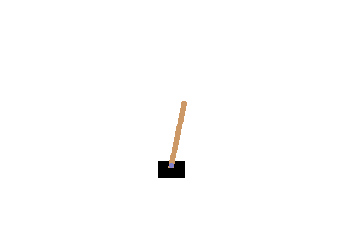

In [41]:
plot_animation(frames)